In [1]:
from pypetri.elements import *
from pypetri.petri_net import *
from pypetri.example_nets import *
import math
import csv
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.distributions import Categorical
import matplotlib.pyplot as plt
import collections
import random

from tqdm import tqdm


In [2]:
class PNAgent():
    def __init__(self):
        pass
    
    def take_action(self, state):
        state_p = state[0]
        state_t = state[1]
        
        choix = np.where((state_t[:, 0] == 1) & (state_t[:, 1] == 0))[0]
        # if choix.size > 0:
            
        # print(choix)
        if choix.size > 1:
            return choix[0].item()+1
        else:
            return 0
    
    def update(self):
        pass

In [3]:
lr = 2e-3
gamma = 0.98
epsilon = 0.05
num_episode = 500
target_update = 10
buffer_size = 10000
minimal_size = 500
batch_size = 64

efm_net = EmptyNet('efm_net')
# initial_file_path = 'initial_file/neural_petri_net.csv'
initial_file_path = 'initial_file/test_net_2.csv'
efm_net.init_by_csv(initial_file_path)
efm_net.set_dt(1)

lp = efm_net.get_state()[0].shape[1]
lt = efm_net.get_state()[1].shape[1]
action_dim = efm_net.get_action_space()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

agent = PNAgent()

cuda


In [4]:
state = efm_net.get_state()
action = agent.take_action(state)

In [5]:

return_list = []
action_list = []
for i in range(1):
    with tqdm(total=int(num_episode / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episode / 10)):
            episode_return = 0
            state = efm_net.reset()
            done = False
            this_action = []
            
            while not done:
                action = agent.take_action(state)
                this_action.append(action)
                print(action)
                next_state, reward, done = efm_net.step(action)
                state = next_state
                print(state)

                episode_return += reward


                if efm_net.train_time > 100:
                    done = True
                        
            
            return_list.append(episode_return)
            action_list.append(this_action)

Iteration 0:   0%|          | 0/50 [00:00<?, ?it/s]

1
[array([[24.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0., 25.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.]]), array([[0.  , 1.  , 0.25],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])]
6
[array([[24.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0., 25.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.]]), array([[0. , 1. , 0.5],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [1. , 0. , 0. ]])]
0


Iteration 0:   0%|          | 0/50 [00:02<?, ?it/s]


[-7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999, -7.44999999999999]


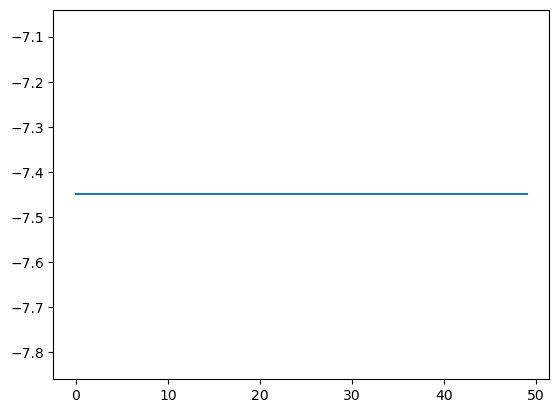

In [6]:
print(return_list)
plt.plot(range(len(return_list)), return_list)

In [7]:
print(action_list)

[[1, 6, 0, 0, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0], [1, 6, 0, 0, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0], [1, 6, 0, 0, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3, 0], [1, 6, 0, 0, 2, 6, 0, 0, 1, 3, 0, 0, 6, 4, 7, 0, 0, 5, 7, 0, 0, 7, 2, 6, 0, 0, 1, 3,

In [8]:
action_path = 'action_logic.csv'

with open(action_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(action_list)